Porto Seguro's Safe Driver Prediction
====

## Introduction
[This competition](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data) is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the probability that a driver will initiate an insurance claim in the next year.

In the train data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. **Values of -1 indicate that the feature was missing** from the observation. The target columns signifies whether or not a claim was filed for that policy holder

train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.


In [0]:
# Import libraries
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read csv file and take a look at it
train = pd.read_csv('/content/drive/My Drive/train_4.csv')
# Your code here
train.head()


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0] # Your code here
columns = train.shape[1] # Your code here
print("The train dataset contains {} rows and {} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## 1. Data Quality Checks

### Null or missing values check
Let check whether there are any null values in the train dataset as follows:

In [5]:
# Your code here
train.isnull().values.any()

False

**Note:** Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as *"Values of -1 indicate that the feature was missing from the observation"*. Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [0]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

We can use "Missingno" to visualize missing values in the dataset.

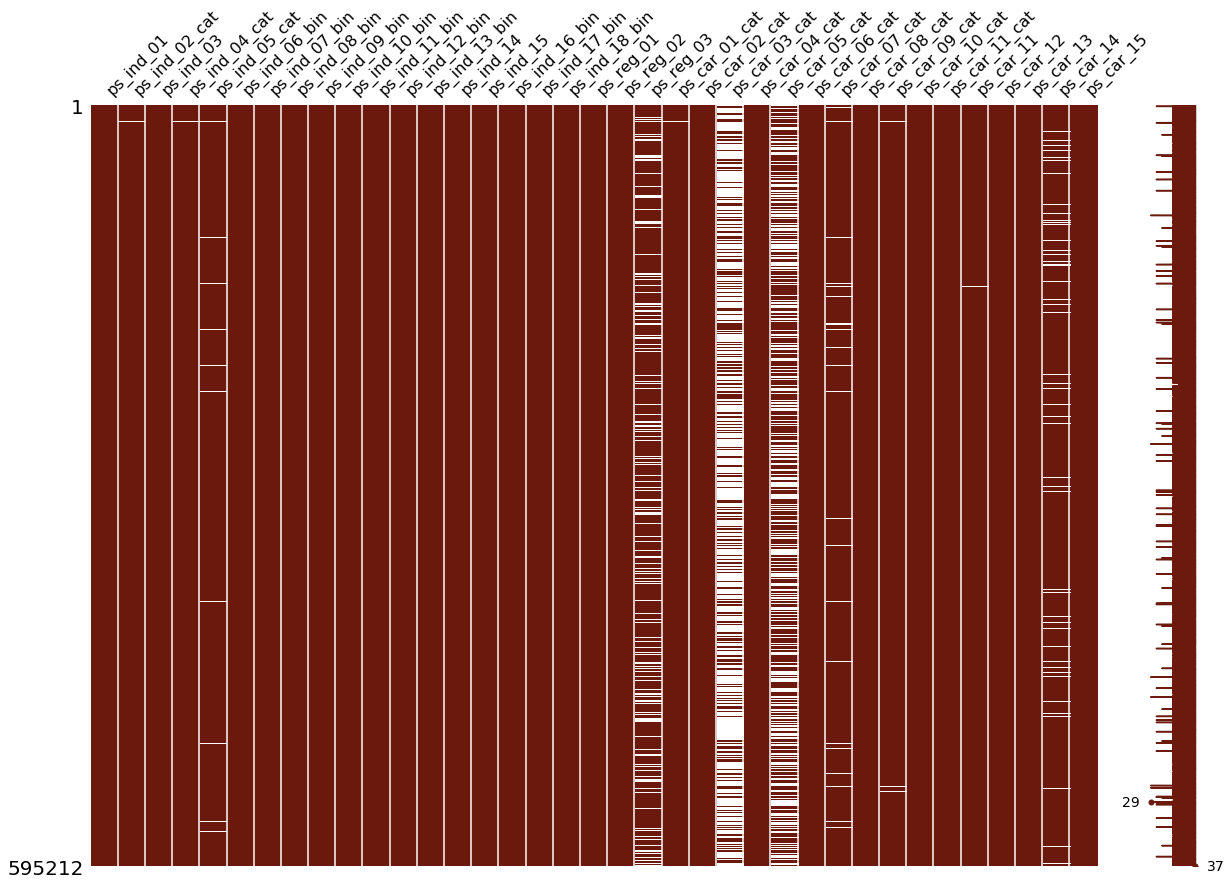

In [7]:
# If you don't have "Missingno" package, use this command to install
# (Linux) conda install -c conda-forge missingno
import missingno as msno

msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [8]:
# List null columns name
# Hint: isnull()
# Your code here
train_copy.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


#### Target variable inspection

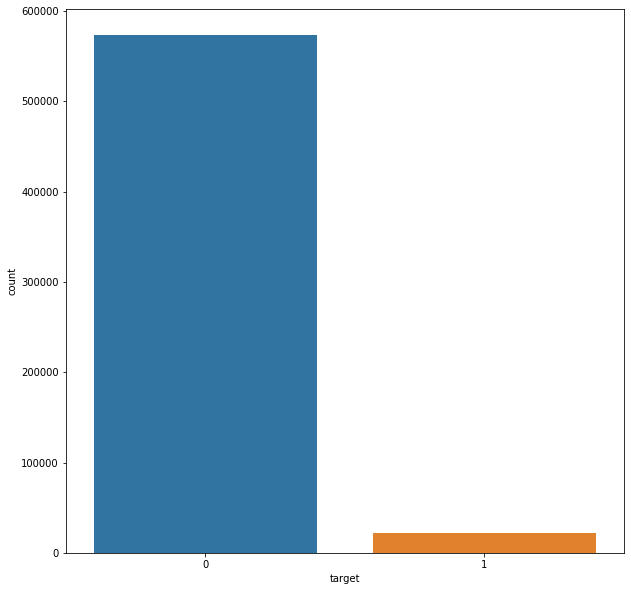

In [9]:
# Using countplot to represent target
# Your code here
plt.figure(figsize=(10, 10))
sns.countplot(x='target',data=train)
plt.show()

## 2. Feature inspection and filtering

### Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

#### Correlation of float features

In [0]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

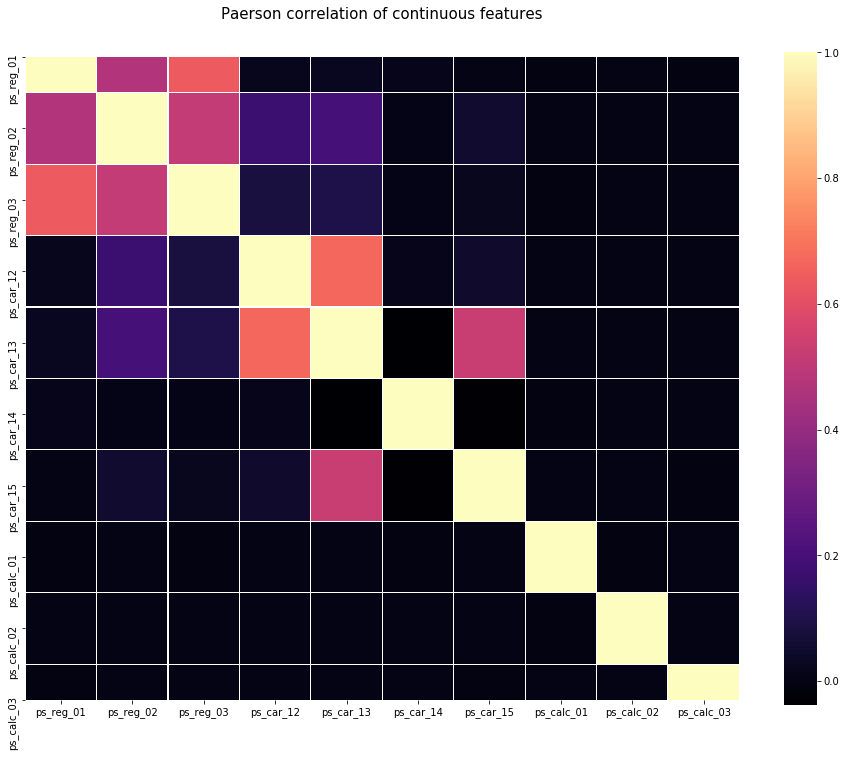

In [11]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

(ps_reg_01, ps_reg_03)

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

### Correlation of integer features

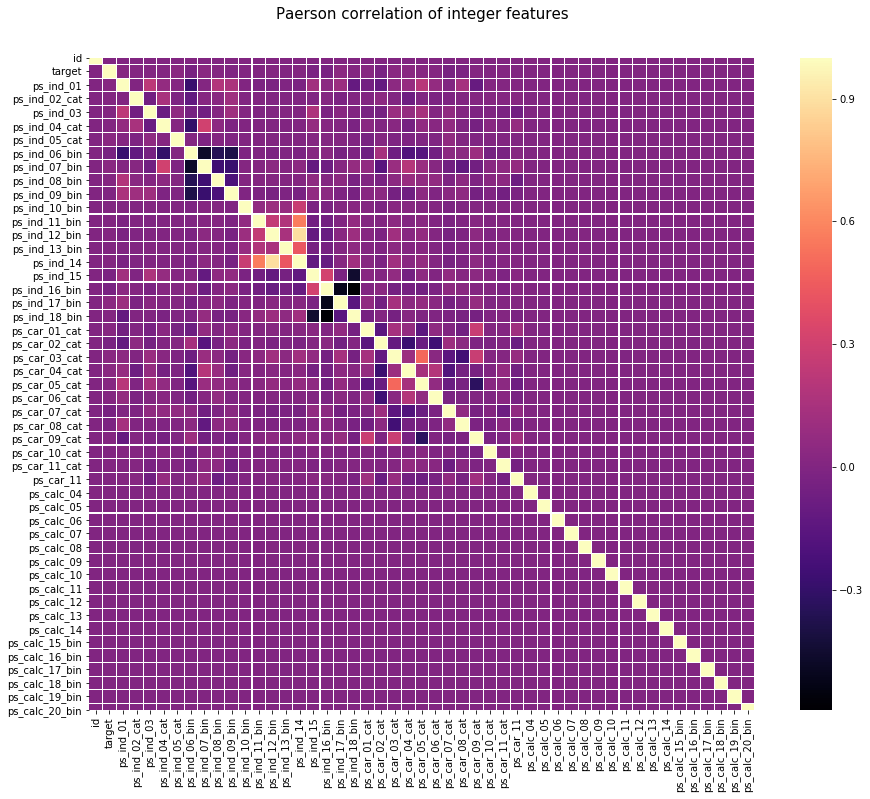

In [12]:
# Your code here
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of integer features", y=1.05, size=15)
sns.heatmap(train_int.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
# Hint: correlation of train_int
plt.show()

#### Which features have negatively correlation?
Negatively correlated features : **Your answer here**

### Binary features inspection
Another aspect of the data that we may want to inspect would be the coulmns that only contain binary valeus, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly bar plot of these binary values as follows:

In [0]:
bin_col = list(filter(lambda x: '_bin' in x, train.columns))
bin_value_counts = train[bin_col].apply(pd.value_counts)

In [14]:
bin_value_counts

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,360852,442223,497644,484917,594990,594205,589594,594648,201882,523143,503879,522342,221514,265356,424278,387469,503955
1,234360,152989,97568,110295,222,1007,5618,564,393330,72069,91333,72870,373698,329856,170934,207743,91257


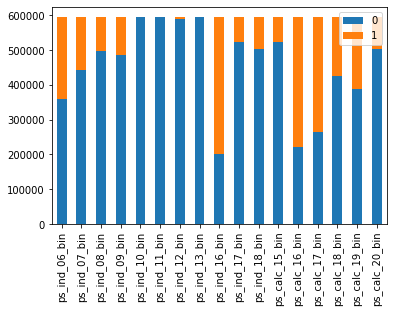

In [15]:
# hint pandas plot.bar with stacked=True
# Your code here
bin_value_counts.T.plot(kind='bar',stacked=True)

Those columns ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. They do not contain much information.

## 3. Preprocess Data

In [0]:
# Import train_test_split 
# Your code here
from sklearn.model_selection import train_test_split

In [0]:
# Define X (features), y (target)
X = train.iloc[:,train.columns!='target']# Your code here
y = train['target']# Your code here

In [0]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)# Your code here

#### Randomly Under-Sampling the Training Dataset¶
**Note:** Validate ratio between 2 class after Under-Sampling

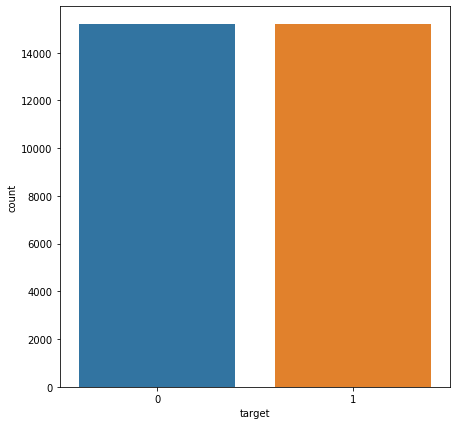

In [19]:
# Your code here
training_data = pd.concat ([X_train,y_train],axis = 1)
# Select row which "target" is 1 and save in target_data
target_data = training_data[training_data['target'] == 1]# Your code here
# Select row which "target" is 0 and save in non_target_data
non_target_data = training_data[training_data['target'] == 0]# Your code here

# Number of target, non-target transactions
number_records_target = len(target_data)# Your code here
number_records_non_target = len(non_target_data)# Your code here

# Using sample function on data frame to randomly select number_records_target from non_target_data data frame
under_sample_non_target = non_target_data.sample(number_records_target)# Your code here
# **concat** under_sample_non_target and target_data to form under_sample_data
under_sample_data = pd.concat ([under_sample_non_target, target_data], axis = 0)# Your code here

# Assigning X,y for Under-sampled Data
X_train_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'target']# Your code here
y_train_undersample = under_sample_data['target']# Your code here

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio between 2 target on "target" column
# Your code here
sns.countplot(x='target',data=under_sample_data)
plt.show()

#### Randomly Over-Sampling the Training Dataset
**Note:** Validate ratio between 2 target after Over-Sampling

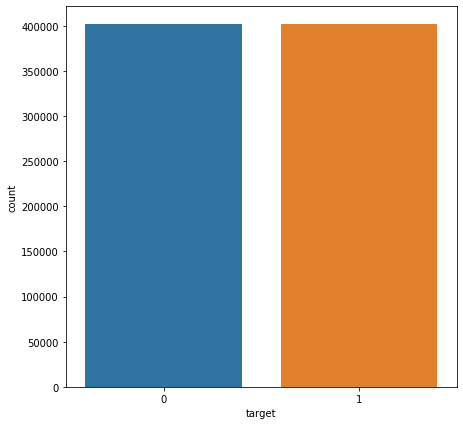

In [20]:
# Your code here
# target/non-target data
# Select row which "target" is 1 and save in target_data
target_data = training_data[training_data['target'] == 1]# Your code here
# Select row which "target" is 0 and save in non_target_data
non_target_data = training_data[training_data['target'] == 0]# Your code here

# Number of target, non-target transactions
number_records_target = len(target_data)# Your code here
number_records_non_target = len(non_target_data)# Your code here

# Using sample on target_data with replacement "replace = True",  since we take a larger sample than population
over_sample_target = target_data.sample(number_records_non_target,replace = True)# Your code here
# **concat** over_sample_target and non_target_data to form under_sample_data
over_sample_data = pd.concat ([over_sample_target, non_target_data], axis = 0)# Your code here

# Assigning X, y for over-sampled dataset
X_train_oversample = over_sample_data.iloc[:,over_sample_data.columns != 'target']# Your code here
y_train_oversample = over_sample_data['target']# Your code here

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio between 2 class on "Class" column
# Your code here
sns.countplot(x='target',data=over_sample_data)
plt.show()

## 4. Modeling

In [0]:
# Spot check with LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, BernoulliNB, GaussianNB, SVM
# Import lib
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

lr = LogisticRegression()# Your code here: create logistic regression model
dtc = DecisionTreeClassifier()# Your code here: create decision tree model
rfc = RandomForestClassifier()# Your code here: create random forest model
bnb = BernoulliNB()# Your code here: create BernoulliNB model
gnb = GaussianNB()# Your code here: create GaussianNB model
svm = SVC()# Your code here: create SVM model


models = [lr, dtc, rfc, gnb, bnb, svm]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB", "SVM"]

## 5. Evaluation Metrics

In [0]:
# Import confusion_matrix, classification_report
# Your code here
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y
def evaluate_model(estimator, X, y):
    # Note: We should test on the original test set
    print('Confusion matrix:\n', confusion_matrix(y,estimator))
    print('Classification report:\n', classification_report(y,estimator))
    print('Testing set information:\n', y.value_counts())

    # Set print options
    np.set_printoptions(precision=2)

### Evaluate with Origin dataset

In [23]:
# Now we will test on origin dataset (X_train_sub, y_train_sub)
# We loop for models
# For each model, we train with train_sub dataset
# and use evaluate_model function to test with test set
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    model.fit(X_train,y_train)
    evaluate_model(model.predict(X_test),X_train,y_test)
    print("=======================================")

Model: Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[172051      0]
 [  6513      0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172051
           1       0.00      0.00      0.00      6513

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[163670   8381]
 [  6074    439]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172051
           1       0.05      0.07      0.06      6513

    accuracy                           0.92    178564
   macro avg       0.51      0.51      0.51    178564
weighted avg       0.93      0.92      0.92    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Random Forest


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion matrix:
 [[172043      8]
 [  6511      2]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172051
           1       0.20      0.00      0.00      6513

    accuracy                           0.96    178564
   macro avg       0.58      0.50      0.49    178564
weighted avg       0.94      0.96      0.95    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Bernoulli NB
Confusion matrix:
 [[172051      0]
 [  6513      0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172051
           1       0.00      0.00      0.00      6513

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Gaussian NB
Confusion matrix:
 [[172030     21]
 [  6502     11]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172051
           1       0.34      0.00      0.00      6513

    accuracy                           0.96    178564
   macro avg       0.65      0.50      0.49    178564
weighted avg       0.94      0.96      0.95    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64


### Evaluate with *Undersampled* dataset

In [24]:
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Undersampled dataset
    model.fit(X_train_undersample,y_train_undersample)
    evaluate_model(model.predict(X_test),X_train_undersample,y_test)
    # Evaluate model with X_test, y_test
    print("=======================================")

Model: Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[109538  62513]
 [  3195   3318]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.64      0.77    172051
           1       0.05      0.51      0.09      6513

    accuracy                           0.63    178564
   macro avg       0.51      0.57      0.43    178564
weighted avg       0.94      0.63      0.74    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[90264 81787]
 [ 3031  3482]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.52      0.68    172051
           1       0.04      0.53      0.08      6513

    accuracy                           0.52    178564
   macro avg       0.50      0.53      0.38    178564
weighted avg       0.93      0.52      0.66    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Random Fores

### Evaluate with *Oversampled* dataset

In [25]:
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Oversampled dataset
    model.fit(X_train_oversample,y_train_oversample)
    evaluate_model(model.predict(X_test),X_train_oversample,y_test)
    # Evaluate model with X_test, y_test
    print("=======================================")

Model: Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[106890  65161]
 [  2911   3602]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.62      0.76    172051
           1       0.05      0.55      0.10      6513

    accuracy                           0.62    178564
   macro avg       0.51      0.59      0.43    178564
weighted avg       0.94      0.62      0.73    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[165121   6930]
 [  6204    309]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    172051
           1       0.04      0.05      0.04      6513

    accuracy                           0.93    178564
   macro avg       0.50      0.50      0.50    178564
weighted avg       0.93      0.93      0.93    178564

Testing set information:
 0    172051
1      6513
Name: target, dtype: int64
Model: Random F

### Conclusion

Which model has lowest/highest accuracy?
Which model has lowest/highest recall?
Which model has lowest/highest f1?

## 6. GridsearchCV

In [0]:
# Using gridsearchcv, random forest model and this param grid to find the best combination of parameters 
# Hint: example
# https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}



#### which is the best combination of parameter

In [0]:
# Your code here
from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(RandomForestClassifier(), param_grid = param_grid)
gridcv.fit(X_train, y_train)
pd.DataFrame(gridcv.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Done! Great Job.